<a href="https://colab.research.google.com/github/mlgancena/ge120/blob/main/GANCE%C3%91A_ME5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given:
* COVID-Cases-brgy.csv
* qc_brgys.gpkg

Output:
1. choropleth map of monthly COVID-19 cases of qc barangays
2. charts that summarize data given and monthly map
3. pngs of map and charts with 'year-month' as filename
4. README.txt contain details of the charts and maps to guide users

# CSV Calculations

In [ ]:
# module import
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
import math

In [ ]:
cases = pd.read_csv("COVID-Cases-brgy.csv") # read csv file

cases['DateRepConf']= pd.to_datetime(cases['DateRepConf']) # convert DateRepConf column to datetime
cases['Month'] = cases['DateRepConf'].dt.month # create column 'Month' and 'Year' from DateRepConf
cases['Year'] = cases['DateRepConf'].dt.year

bgydate = cases.drop(['Unnamed: 0','DateRepConf'], axis = 1) # remove column Unnamed and DateRepConf
bgydate.head()

,Bgy_Name,Cases,Month,Year
0,Amihan,3,9,2020
1,Baesa,1,9,2020
2,Bagbag,4,9,2020
3,Bagong Lipunan Ng Crame,7,9,2020
4,Bagong Pag-asa,2,9,2020


In [ ]:
# whole block cell is for creating lists corresponding to year, month, bgy name and date
yearlist = list(dict.fromkeys(bgydate['Year']))
monthlist = list(dict.fromkeys(bgydate['Month']))
monthlist.sort()
bgylist = list(dict.fromkeys(bgydate['Bgy_Name']))
bgylist.sort()

datelist = []
for year in yearlist:
  for month in monthlist:
    datelist.append(str(year) + '-' + str(month))


In [ ]:
# some barangays have missing year-month and cases data
for year in yearlist:
  yearcases = bgydate.loc[bgydate['Year'] == year]
  for month in monthlist:
    yearmonthcases = yearcases.loc[yearcases['Month'] == month]
    for bgy in bgylist:
      if list(dict.fromkeys(yearmonthcases['Month'])) not in monthlist:
        emptyrow = {'Bgy_Name': bgy, 'Month': month, 'Year': year, 'Cases' : 0} # assign 0 to missing values
        bgydate.loc[len(bgydate)] = emptyrow
      else:
        pass

month_cases = bgydate.groupby(['Bgy_Name','Month','Year'])['Cases'].sum() # group columns based on bgyname, month, year and add their corresponding cases
month_cases.reset_index()
month_cases.to_csv('MonthCases.csv')
mcases = pd.read_csv("MonthCases.csv")
mcases.head()

,Bgy_Name,Month,Year,Cases
0,Alicia,1,2020,0
1,Alicia,1,2021,0
2,Alicia,1,2022,235
3,Alicia,1,2023,0
4,Alicia,2,2020,0


In [ ]:
monthdata = pd.DataFrame({'Bgy_Name': bgylist}) # create new dataframe
rowcounter = 0 # for calling the index of date in datelist
for year in yearlist:
  for month in monthlist:
      yearcases = mcases.loc[mcases['Year'] == year] # locate all rows with the same year value (ex: 2020)
      yearmonthcases = yearcases.loc[yearcases['Month'] == month] # locate from previous csv the rows with the same month value (ex: 1)
      yearmonthlist = yearmonthcases['Cases'].tolist() # create list to be converted to column data
      monthdata[datelist[rowcounter]] = yearmonthlist # create column with name yearmonth (ex. 2020-1) with created list
      rowcounter += 1
monthdata.head()

,Bgy_Name,2020-1,2020-2,2020-3,2020-4,2020-5,2020-6,2020-7,2020-8,2020-9,...,2023-3,2023-4,2023-5,2023-6,2023-7,2023-8,2023-9,2023-10,2023-11,2023-12
0,Alicia,0,0,0,0,0,0,0,0,22,...,0,2,0,0,0,0,0,0,0,0
1,Amihan,0,0,0,0,0,0,0,0,18,...,0,1,1,0,0,0,0,0,0,0
2,Apolonio Samson,0,0,0,0,0,0,0,0,83,...,1,6,3,0,0,0,0,0,0,0
3,Aurora,0,0,0,0,0,0,0,0,12,...,2,6,1,0,0,0,0,0,0,0
4,Baesa,0,0,0,0,0,0,0,0,81,...,0,1,6,0,0,0,0,0,0,0


In [ ]:
updmonthdata = monthdata.loc[:, (monthdata != 0).any(axis=0)] # remove columns where all rows are = 0
upddatelist = list(updmonthdata.columns)
upddatelist.remove('Bgy_Name')
print(upddatelist)
updmonthdata.head()

['2020-9', '2020-10', '2020-11', '2020-12', '2021-1', '2021-2', '2021-3', '2021-4', '2021-5', '2021-6', '2021-7', '2021-8', '2021-9', '2021-10', '2021-11', '2021-12', '2022-1', '2022-2', '2022-3', '2022-4', '2022-5', '2022-6', '2022-7', '2022-8', '2022-9', '2022-10', '2022-11', '2022-12', '2023-1', '2023-2', '2023-3', '2023-4', '2023-5']


,Bgy_Name,2020-9,2020-10,2020-11,2020-12,2021-1,2021-2,2021-3,2021-4,2021-5,...,2022-8,2022-9,2022-10,2022-11,2022-12,2023-1,2023-2,2023-3,2023-4,2023-5
0,Alicia,22,23,14,26,0,7,55,142,59,...,22,29,15,6,5,0,5,0,2,0
1,Amihan,18,8,4,6,2,10,38,77,22,...,22,15,15,6,3,1,1,0,1,1
2,Apolonio Samson,83,57,36,15,42,13,174,329,103,...,41,39,40,20,28,2,5,1,6,3
3,Aurora,12,10,5,9,3,33,58,87,35,...,14,22,14,1,5,0,0,2,6,1
4,Baesa,81,39,36,33,23,17,169,331,151,...,56,54,43,16,17,7,0,0,1,6


# GeoPandas

In [ ]:
qcmap = gpd.read_file('qc_brgys.gpkg') # import geopackage
qcmap.set_index('Bgy_Name', drop=True, inplace=True) # set index to barangay name

qccases = qcmap.merge(updmonthdata, on = 'Bgy_Name', how = 'left') # merge csv file with geopackage using 'Bgy_Name' as basis
qccases.head()

,Bgy_Name,Reg_Code,Reg_Name,Pro_Code,Pro_Name,Mun_Code,Mun_Name,Bgy_Code,geometry,2020-9,...,2022-8,2022-9,2022-10,2022-11,2022-12,2023-1,2023-2,2023-3,2023-4,2023-5
0,Alicia,PH130000000,NATIONAL CAPITAL REGION (NCR),PH137400000,"NCR, SECOND DISTRICT (Not a Province)",PH137404000,QUEZON CITY,PH137404001,"MULTIPOLYGON (((121.02636 14.66282, 121.02652 ...",22,...,22,29,15,6,5,0,5,0,2,0
1,Amihan,PH130000000,NATIONAL CAPITAL REGION (NCR),PH137400000,"NCR, SECOND DISTRICT (Not a Province)",PH137404000,QUEZON CITY,PH137404002,"MULTIPOLYGON (((121.07066 14.63097, 121.07059 ...",18,...,22,15,15,6,3,1,1,0,1,1
2,Apolonio Samson,PH130000000,NATIONAL CAPITAL REGION (NCR),PH137400000,"NCR, SECOND DISTRICT (Not a Province)",PH137404000,QUEZON CITY,PH137404003,"MULTIPOLYGON (((121.01521 14.66081, 121.01518 ...",83,...,41,39,40,20,28,2,5,1,6,3
3,Aurora,PH130000000,NATIONAL CAPITAL REGION (NCR),PH137400000,"NCR, SECOND DISTRICT (Not a Province)",PH137404000,QUEZON CITY,PH137404004,"MULTIPOLYGON (((121.00974 14.61405, 121.00962 ...",12,...,14,22,14,1,5,0,0,2,6,1
4,Baesa,PH130000000,NATIONAL CAPITAL REGION (NCR),PH137400000,"NCR, SECOND DISTRICT (Not a Province)",PH137404000,QUEZON CITY,PH137404005,"MULTIPOLYGON (((121.01625 14.68059, 121.01639 ...",81,...,56,54,43,16,17,7,0,0,1,6


# Maps

In [ ]:
for selectdate in upddatelist: # for every month-year
  # determine range of legend
  maxrange = max(qccases[selectdate].tolist()) # get maximum value of cases possible in a month
  qcrange = round(maxrange,-2) # round to two
  if maxrange > qcrange: # ex: 436 rounded to 400
      maprange = qcrange + 100 # add 100 so that it is 500
  else:
    maprange = qcrange

  qccases.plot(column= selectdate, legend=True, cmap="Reds",  vmin=0, vmax=maprange, edgecolor='black', linewidth=0.3 ,
                               legend_kwds={"label": "Number of Cases", "orientation": "vertical"})
  plt.axis('off') # turn off axis
  plt.title('Covid Cases in Quezon City ({})'.format(selectdate)) # set title
  plt.savefig('{}.png'.format(selectdate), format='png', bbox_inches='tight', dpi=100) # save figure
  plt.close()

# Chart Function

In [ ]:
def getxlabel(datelist):
  '''
  Gets the tick labels of a chart's x axis

  Parameters
    datelist :   list, list of date strings to be used as tick labels

  Return
    xlabels :    list, derived from datelist; shorter version to be used for x axis tick labeling
  '''
  if len(datelist)%2 == 0: # if even number of months
    halfindex = int((len(datelist))/2)
  else:
    newlen = int(len(datelist) - 1) # if odd number of months, subtract 1 to make it even
    halfindex = int(newlen/2)

  # creates a list with 9 items with same interval, ex. [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]
  quarterindex = int(halfindex/2)
  eightindex = int(quarterindex/2)
  xlabels = [datelist[0], datelist[0 + eightindex], datelist[0 + quarterindex], datelist[0 + quarterindex + eightindex],
             datelist[0+halfindex], datelist[0 + halfindex + eightindex], datelist[0 + halfindex + quarterindex],
             datelist[0 + halfindex + quarterindex + eightindex] ,datelist[-1]]
  return xlabels

# Single-Line Chart

In [ ]:
xsum = upddatelist # x axis = list of all year-month (with data)
ychart = []
for date in xsum:
  ylist = qccases[date].tolist() # y axis = list of sum of cases per year-month
  ychart.append(sum(ylist))
plt.plot(xsum,ychart, color = 'red', marker = '.') # plots the graph with points

xlabels = getxlabel(xsum) # get x axis labels

plt.xticks(xlabels, rotation = 30) # set tick labels as list created above
plt.xlabel("Date")  # add X-axis label
plt.ylabel("Total Cases")  # add Y-axis label
plt.title("Monthly Total of COVID-19 Cases in Quezon City ({})".format(xsum[0] + ' to ' + xsum[-1]))  # add title
plt.savefig('Monthly-Cases-SingleLine.png', format='png', bbox_inches='tight', dpi=100) # save figure
plt.close()

# Multi-Line Chart

In [ ]:
monthnamelist = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
xlines = monthnamelist # x axis = month names

sumlist = []
for date in datelist: # create one list of all sums for every year-month
  sumdate = monthdata[date].tolist()
  sumlist.append(sum(sumdate))

for i in range(len(sumlist)): # replace any zero in the list with nan
  if sumlist[i] == 0:
    sumlist[i] = float('nan')

sumdict = {}
indexcounter = 0 # counter for index calling purposes
for year in yearlist: # create dictionary of year: list of sum of cases per month
  sumdict.update({year: sumlist[0 + (indexcounter * 12): 12 + (indexcounter * 12)]}) # to call only the indeces of sums for one year
  indexcounter += 1

for year in yearlist: # plotting the different lines for each year
  plt.plot(xlines, sumdict[year], label = year) # y axis = list of sum of cases per year-month

plt.legend() # legend
plt.xticks(rotation = 45)
plt.xlabel("Month")  # add X-axis label
plt.ylabel("Total Cases")  # add Y-axis label
plt.title("Monthly Total of COVID-19 Cases in Quezon City ({})".format(str(yearlist[0]) + ' to ' + str(yearlist[-1])))  # add title
plt.savefig('Monthly-Cases-MultiLine.png', format='png', bbox_inches='tight', dpi=100) # save figure
plt.close()

# Range Chart

In [ ]:
xrangeline = upddatelist # x axis = list of all year-month
rangelist = [] # y axis = list of all maximum map ranges

for selectdate in upddatelist: # for every month-year
  # determine range of legend
  maxrange = max(qccases[selectdate].tolist()) # get maximum value of cases possible in a month
  qcrange = round(maxrange,-2) # round to two
  if maxrange > qcrange: # ex: 436 rounded to 400
      maprange = qcrange + 100 # add 100 so that it is 500
  else:
    maprange = qcrange
  rangelist.append(maprange)

xrangelabel = getxlabel(xrangeline) # get x axis labels

plt.plot(upddatelist, rangelist, color = 'red', marker ='.')
plt.xticks(xrangelabel, rotation = 30) # set tick labels as list created above
plt.xlabel("Date")  # add X-axis label
plt.ylabel("Maximum Range")  # add Y-axis label
plt.title("Maximum Range Used for Mapping Monthly Covid-19 Cases in Quezon City")  # add title
plt.savefig('Monthly-Cases-MaxRange.png', format='png', bbox_inches='tight', dpi=100) # save figure
plt.close()

# Bar Chart

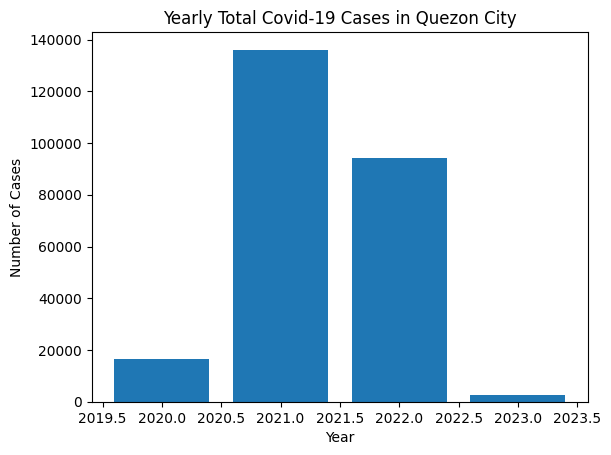

In [ ]:
pielist = []
pielabel = yearlist # labels = 2020,2021,2022,2023

for year in yearlist:
  yearnp = np.array(sumdict[year]) # convert list to numpy to easily turn nan values to 0
  yearnp[np.isnan(yearnp)] = 0
  pielist.append(np.sum(yearnp))

plt.bar(yearlist,pielist) # create bar chart
plt.title('Yearly Total Covid-19 Cases in Quezon City') # title
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.savefig('Yearly-Cases-Bar.png', format='png', bbox_inches='tight', dpi=100) # save figure
plt.show()

# README.txt




In [ ]:
with open('README.txt','w+') as readme: # readme file
    description = ['Files Created:\n',
                   'year-month.png:\n\tMultiple files\n',
                   '\tChoropleth map of monthly COVID-19 cases of Quezon City barangays',
                   '\n\tMonthly maps differ in range to better illustrate the number of cases per barangay'
                  '\nMonthly-Cases-SingleLine.png \n\tLine graph showing the total number of covid cases in quezon city over the months',
                   '\n\tTo be able to see and compare the difference in the number of cases per month'
                   '\nMonthly-Cases-MultiLine.png \n\tMulti-line graph showing the total number of covid cases in quezon city over the months',
                   '\n\tEach different colored line represents a year',
                   '\n\tTo be able to see if there are trends depending on the month',
                   '\nMonthly-Cases-MaxRange.png',
                   '\n\tLine graph showing the maximum range used in plotting the year-month map',
                   '\n\tTo be able to see and compare the difference in the maximum number of cases a barangay has in that month',
                   '\nYearly-Cases-Bar',
                   '\n\tBar chart where each bar represents how many covid cases are in that year',
                   '\n\tTo be able to see the yearly number of cases and compare it to other years']
    readme.writelines(description)